
Лабораторная работа #3
Цель: Ознакомиться с датасетом StackSample — 10% вопросов/ответов Stack Overflow, (ссылка на Kaggle) и выполнить его классическую обработку: очистку, нормализацию, агрегирование и базовый анализ.

Задачи:

Загрузка данных: Получить единый датасет. Изучить структуру данных (например, таблицы Questions, Answers, Tags) и объединить необходимые части (связать вопросы с их ответами).

Очистка текста: Привести сырой текст к чистому виду. Удалить HTML-разметку, Markdown, код и прочий «шум» из текста вопросов и ответов. Применить нормализацию: привести текст к единому регистру, удалить стоп-слова и лишние символы, при необходимости выполнить лемматизацию.

Агрегация и регуляризация данных: Вычислить основные характеристики датасета. Например, определить количество вопросов, среднее число ответов на вопрос, распределение рейтингов. Выполнить агрегирование по тегам: выявить топ-10 самых популярных тегов, подсчитать количество вопросов по категориям (языки программирования, темы и т.д.).

Первичный анализ и визуализация: Проанализировать полученные результаты. Составить краткое описание датасета: какие типы вопросов встречаются чаще всего, каковы типичные размеры вопросов и ответов, есть ли пропуски или аномалии в данных. При возможности, визуализировать некоторые статистики (график распределения частоты тегов, длины вопросов и т.д.) для лучшего понимания структуры данных.

Выводы: Подготовить краткий отчет по результатам лабораторной работы. Описать выполненные шаги очистки и нормализации, а также основные статистические выводы о датасете Stack Overflow.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Лабаораторная работа #3

## Загрузка данных.

In [20]:
# Датасет Answers.csv
answers = pd.read_csv('dataset/Answers.csv', encoding='latin1')
# Выводим первые 5 строк
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...
2,199,50.0,2008-08-01T19:36:46Z,180,1,<p>I've read somewhere the human eye can't dis...
3,269,91.0,2008-08-01T23:49:57Z,260,4,"<p>Yes, I thought about that, but I soon figur..."
4,307,49.0,2008-08-02T01:49:46Z,260,28,"<p><a href=""http://www.codeproject.com/Article..."


In [21]:
# Датасет Questions.csv
questions = pd.read_csv('dataset/Questions.csv', encoding='latin1')
# Выводим первые 5 строк
questions.head()

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [22]:
# Датасет Tags.csv
tags = pd.read_csv('dataset/Tags.csv', encoding='latin1')
# Выводим первые 5 строк
tags.head()

,Id,Tag
0,80,flex
1,80,actionscript-3
2,80,air
3,90,svn
4,90,tortoisesvn


## Объединение данных

In [77]:
# Создание большого датасета для вопросов
def create_questions_dataset(questions, answers, tags):
    # Объединение вопросов и ответов по Id вопросов и ParentId ответов
    questions_dataset = pd.merge(questions, answers, left_on='Id', right_on='ParentId', how='left',
                                 suffixes=('_question', '_answer'))
    # Объединение вопросов и тегов по Id вопросов и Id тегов
    questions_dataset = pd.merge(questions_dataset, tags, left_on='Id_question', right_on='Id', how='left')
    # Удаляем лишние столбцы
    questions_dataset = questions_dataset.drop(columns=['Id_answer', 'ParentId', 'Id'])
    # Переименовываем столбец
    questions_dataset = questions_dataset.rename(columns={'Id_question': 'Id'})

    return questions_dataset

In [107]:
# Создаем датасет вопросов
questions_dataset = create_questions_dataset(questions, answers, tags)

In [108]:
# Выводим первые 5 строк
questions_dataset.head()

,Id,OwnerUserId_question,CreationDate_question,ClosedDate,Score_question,Title,Body_question,OwnerUserId_answer,CreationDate_answer,Score_answer,Body_answer,Tag
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,26.0,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...,flex
1,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,26.0,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...,actionscript-3
2,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,26.0,2008-08-01T16:09:47Z,12.0,<p>I wound up using this. It is a kind of a ha...,air
3,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,1109.0,2008-08-13T16:09:09Z,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",flex
4,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...,1109.0,2008-08-13T16:09:09Z,6.0,"<p>The <a href=""http://en.wikipedia.org/wiki/S...",actionscript-3


#

# Очистка текста

In [85]:
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')  # Загрузка стоп-слов
nltk.download('wordnet')  # Загрузка WordNet
nltk.download('averaged_perceptron_tagger_eng')  # Загрузка тегов

[nltk_data] Downloading package stopwords to C:\Users\VORANDPAV BIG
[nltk_data]     SPB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\VORANDPAV BIG
[nltk_data]     SPB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\VORANDPAV BIG
[nltk_data]     SPB\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [113]:
stop_words = set(stopwords.words('english'))  # Загрузка стоп-слов
contractions = ['ive', 'youre', 'theyre', 'hes', 'shes', 'its', 'weve', 'theyve', 'im', 'isnt', 'wasnt', 'werent',
                'hasnt', 'havent', 'dont', 'doesnt', 'didnt', 'cant', 'couldnt', 'shouldnt', 'mightnt', 'mustnt',
                'wouldnt']  # Список сокращений
lemmatizer = WordNetLemmatizer()  # Загрузка лемматизатора


# Функция опеределения части речи для лемматизации
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


# Функция для очистки текста
def clean_text(text):
    if not isinstance(text, str):  # Проверяем, что текст является строкой
        return ''

    text = re.sub(r'<code>.*?</code>', '', text, flags=re.DOTALL)  # Удаляем блоки <code>
    text = re.sub(r'\`[^\`]*\`', '', text)  # Удаляем инлайн-код в Markdown
    text = re.sub(r'<[^>]*>', '', text)  # Удаляем оставшиеся HTML-теги
    text = re.sub(r'\[.*?\]\(.*?\)', '', text)  # Удаляем Markdown-ссылки
    text = re.sub(r'"[^"]*"', '', text)  # Удаляем текст в кавычках
    text = re.sub(r'\s+', ' ', text).strip()  # Удаляем лишние пробелы

    text = text.lower()  # Приводим текст к нижнему регистру
    text = re.sub(r'[^a-z0-9\s]', '', text)  # Удаляем все кроме букв, цифр и пробелов

    words = text.split()  # Разбиваем текст на слова
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if
             word not in stop_words and word not in contractions]  # Удаляем стоп-слова и сокращения, лемматизируем слова
    text = ' '.join(words)  # Объединяем слова обратно в текст

    return text


# Проверяем, что функция работает
print('Before cleaning:')
print(questions['Body'].iloc[0])
print('After cleaning:')
print(clean_text((questions['Body'].iloc[0])))
print(get_wordnet_pos('running'))
print(get_wordnet_pos('exists'))
print(get_wordnet_pos('exist'))

Before cleaning:
<p>I've written a database generation script in <a href="http://en.wikipedia.org/wiki/SQL">SQL</a> and want to execute it in my <a href="http://en.wikipedia.org/wiki/Adobe_Integrated_Runtime">Adobe AIR</a> application:</p>

<pre><code>Create Table tRole (
      roleID integer Primary Key
      ,roleName varchar(40)
);
Create Table tFile (
    fileID integer Primary Key
    ,fileName varchar(50)
    ,fileDescription varchar(500)
    ,thumbnailID integer
    ,fileFormatID integer
    ,categoryID integer
    ,isFavorite boolean
    ,dateAdded date
    ,globalAccessCount integer
    ,lastAccessTime date
    ,downloadComplete boolean
    ,isNew boolean
    ,isSpotlight boolean
    ,duration varchar(30)
);
Create Table tCategory (
    categoryID integer Primary Key
    ,categoryName varchar(50)
    ,parent_categoryID integer
);
...
</code></pre>

<p>I execute this in Adobe AIR using the following methods:</p>

<pre><code>public static function RunSqlFromFile(fileName:String)

In [103]:
# Применяем функцию к Body вопросов и ответов
questions_clear = questions.copy()
answers_clear = answers.copy()
questions_clear['Body'] = questions_clear['Body'].swifter.apply(clean_text)
answers_clear['Body'] = answers_clear['Body'].swifter.apply(clean_text)

Pandas Apply: 100%|██████████| 2014516/2014516 [41:50<00:00, 802.46it/s] 


In [166]:
# Сохраняем очищенные вопросы и ответы
questions_clear.to_csv('dataset/Questions_clear.csv', index=False, encoding='latin1')
answers_clear.to_csv('dataset/Answers_clear.csv', index=False, encoding='latin1')

In [106]:
# Проверяем, что функция сработала
print(questions_clear['Body'].head())
print(answers_clear['Body'].head())

0    write database generation script sql want exec...
1    really good tutorial explain branching merge a...
2    anyone get experience create sqlbased aspnet s...
3    something pseudosolved many time never quite f...
4    little game write c us database backend tradin...
Name: Body, dtype: object
0    version control subversion good resource sourc...
1    wound use kind hack actually work pretty well ...
2    read somewhere human eye distinguish less 4 va...
3    yes thought soon figure another domainspecific...
4    oleg shilos c script solution code project rea...
Name: Body, dtype: object


In [114]:
# Объединяем очищенные вопросы и ответы, а также теги
questions_dataset_clear = create_questions_dataset(questions_clear, answers_clear, tags)

In [115]:
# Выводим первые 5 строк очищенного датасета
questions_dataset_clear.head()

,Id,OwnerUserId_question,CreationDate_question,ClosedDate,Score_question,Title,Body_question,OwnerUserId_answer,CreationDate_answer,Score_answer,Body_answer,Tag
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,write database generation script sql want exec...,26.0,2008-08-01T16:09:47Z,12.0,wound use kind hack actually work pretty well ...,flex
1,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,write database generation script sql want exec...,26.0,2008-08-01T16:09:47Z,12.0,wound use kind hack actually work pretty well ...,actionscript-3
2,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,write database generation script sql want exec...,26.0,2008-08-01T16:09:47Z,12.0,wound use kind hack actually work pretty well ...,air
3,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,write database generation script sql want exec...,1109.0,2008-08-13T16:09:09Z,6.0,sqlite api function call something like take o...,flex
4,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,write database generation script sql want exec...,1109.0,2008-08-13T16:09:09Z,6.0,sqlite api function call something like take o...,actionscript-3


In [116]:
# Сохраняем очищенный датасет
questions_dataset_clear.to_csv('dataset/Questions_dataset_clear.csv', index=False, encoding='latin1')

In [3]:
# Загружаем очищенный датасет
questions_dataset = pd.read_csv('dataset/Questions_dataset_clear.csv', encoding='latin1')

In [4]:
# Проверяем, что датасет загружен
questions_dataset.head()

,Id,OwnerUserId_question,CreationDate_question,ClosedDate,Score_question,Title,Body_question,OwnerUserId_answer,CreationDate_answer,Score_answer,Body_answer,Tag
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,write database generation script sql want exec...,26.0,2008-08-01T16:09:47Z,12.0,wound use kind hack actually work pretty well ...,flex
1,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,write database generation script sql want exec...,26.0,2008-08-01T16:09:47Z,12.0,wound use kind hack actually work pretty well ...,actionscript-3
2,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,write database generation script sql want exec...,26.0,2008-08-01T16:09:47Z,12.0,wound use kind hack actually work pretty well ...,air
3,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,write database generation script sql want exec...,1109.0,2008-08-13T16:09:09Z,6.0,sqlite api function call something like take o...,flex
4,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,write database generation script sql want exec...,1109.0,2008-08-13T16:09:09Z,6.0,sqlite api function call something like take o...,actionscript-3


# Агрегация и регуляризация данных

In [119]:
# Выводим основные характеристики датасета
questions_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6391215 entries, 0 to 6391214
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Id                     int64  
 1   OwnerUserId_question   float64
 2   CreationDate_question  object 
 3   ClosedDate             object 
 4   Score_question         int64  
 5   Title                  object 
 6   Body_question          object 
 7   OwnerUserId_answer     float64
 8   CreationDate_answer    object 
 9   Score_answer           float64
 10  Body_answer            object 
 11  Tag                    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 585.1+ MB


In [120]:
# Выводим основные статистики
questions_dataset.describe()

,Id,OwnerUserId_question,Score_question,OwnerUserId_answer,Score_answer
count,6.391215e+06,6.301361e+06,6.391215e+06,5.858989e+06,5.897395e+06
mean,1.904573e+07,1.909812e+06,5.420907e+00,1.502651e+06,2.483504e+00
std,1.186539e+07,1.743874e+06,4.759649e+01,1.553900e+06,1.603567e+01
min,8.000000e+01,1.000000e+00,-7.300000e+01,1.000000e+00,-4.200000e+01
25%,8.489505e+06,4.804130e+05,0.000000e+00,2.899800e+05,0.000000e+00
50%,1.849285e+07,1.329189e+06,1.000000e+00,9.705430e+05,1.000000e+00
75%,2.944044e+07,2.951506e+06,2.000000e+00,2.226112e+06,2.000000e+00
max,4.014338e+07,7.046594e+06,5.190000e+03,7.045028e+06,5.718000e+03


In [121]:
# Выводим количество уникальных вопросов
questions_dataset['Id'].nunique()

1264216

In [123]:
# Выводим количество уникальных ответов
questions_dataset['Body_answer'].nunique()

1915261

In [125]:
# Выводим количество уникальных тегов
questions_dataset['Tag'].nunique()

37034

In [130]:
# Выводим среднее количество ответов на вопрос
questions_dataset.groupby('Id')['Body_answer'].nunique().describe()

count    1.264216e+06
mean     1.563404e+00
std      1.474542e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      4.060000e+02
Name: Body_answer, dtype: float64

In [142]:
# Выводим распределение рейтингов вопросов
questions_raitings = questions_dataset.groupby('Id')['Score_question'].first()
questions_raitings.describe()

count    1.264216e+06
mean     1.781537e+00
std      1.366389e+01
min     -7.300000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.190000e+03
Name: Score_question, dtype: float64

In [143]:
# Выводим распределение рейтингов ответов
questions_raitings = questions_dataset.groupby('Id')['Score_answer'].first()
questions_raitings.describe()

count    1.102568e+06
mean     2.210682e+00
std      1.199056e+01
min     -2.600000e+01
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.276000e+03
Name: Score_answer, dtype: float64

In [10]:
# Сортируем теги по количеству вопросов
tags_count = questions_dataset.groupby('Tag')['Id'].nunique().sort_values(ascending=False).reset_index()
tags_count.columns = ['Tag', 'Count']
# Выводим топ-10 тегов
tags_count.head(10)

,Tag,Count
0,javascript,124155
1,java,115212
2,c#,101186
3,php,98808
4,android,90659
5,jquery,78542
6,python,64601
7,html,58976
8,c++,47591
9,ios,47009


In [164]:
tags_count.describe()

,Count
count,37034.000000
mean,101.255090
std,1578.834319
min,1.000000
25%,2.000000
50%,6.000000
75%,22.000000
max,124155.000000


# Первичный анализ и визуализация

In [165]:
# Общая информация о датасете
print(questions.nunique())
print(answers.nunique())
print(tags.nunique())

Id              1264216
OwnerUserId      630909
CreationDate    1264207
ClosedDate        55949
Score               532
Title           1263995
Body            1264204
dtype: int64
Id              2014516
OwnerUserId      468797
CreationDate    2002766
ParentId        1102568
Score               697
Body            2014375
dtype: int64
Id     1264216
Tag      37034
dtype: int64


Датасет содержит 1264216 уникальных вопросов, каждый содержит в себе столбцы с Id вопроса, Id пользователя, датой создания и закрытия, рейтингом, заголовком и телом вопроса.

Датасет содержит 2014516 уникальных ответов, каждый содержит в себе столбцы с Id ответа, Id пользователя, датой создания, ParentId (Id вопроса), рейтингом и телом ответа.

Датасет содержит 37034 уникальных тегов, каждый содержит в себе столбцы с Id тега и тегом.

Объединять датасеты было принято с основовой - вопросами, так как от него зависят остальные. Поэтому дальнейшие действия будут производиться с объединёным датасетом вопросов, который ещё и был очищен от лишнего текста.

В результате объединения всех трех датасетов выходит опять таки 1264216 уникальных вопросов, но уже 1915261 ответов, что может быть связано с тем, что у нас нету вопросов к которым были даны ответы. При этом все теги были использованы.

В среднем на вопрос из датасета даётся 1.56 ответа. Средний рейтинг вопроса 1.78, при этом медиана равен 0, а 75% вопросов имеют рейтинг меньше, либо равный 1.

В среднем рейтинг ответа 2.2 и 75% ответов имеют рейтинг меньше, либо равный 1.

Самым популярным тегом является javascript. Все остальные места в топ-10 занимают тоже языки программирования. Среднне количество вопросов по тегам 101. При этом медиана равна 6, а 75% тегов имеют меньше 23 вопросов.

In [170]:
# Размеры вопросов
questions['Body'].str.len().describe()

count    1.264216e+06
mean     1.410486e+03
std      1.869814e+03
min      1.800000e+01
25%      5.140000e+02
50%      8.950000e+02
75%      1.600000e+03
max      4.648900e+04
Name: Body, dtype: float64

In [171]:
# Размеры ответов
answers['Body'].str.len().describe()

count    2.014516e+06
mean     7.418622e+02
std      8.876345e+02
min      1.100000e+01
25%      2.870000e+02
50%      5.040000e+02
75%      8.880000e+02
max      5.500100e+04
Name: Body, dtype: float64

In [182]:
# Количестов пропусков в датасете
print('answers\n', answers.isnull().sum())
print('questions\n', questions.isnull().sum())
print('tags\n', tags.isnull().sum())
print('questions_dataset\n', questions_dataset.isnull().sum())

answers
 Id                  0
OwnerUserId     13200
CreationDate        0
ParentId            0
Score               0
Body                0
dtype: int64
questions
 Id                    0
OwnerUserId       14454
CreationDate          0
ClosedDate      1208257
Score                 0
Title                 0
Body                  0
dtype: int64
tags
 Id        0
Tag    1113
dtype: int64
questions_dataset
 Id                             0
OwnerUserId_question       89854
CreationDate_question          0
ClosedDate               6102533
Score_question                 0
Title                          0
Body_question               3374
OwnerUserId_answer        532226
CreationDate_answer       493820
Score_answer              493820
Body_answer               595004
Tag                         2557
dtype: int64


В изначальном датасете вопросов средняя длина вопроса равна 1410 символов. В нём присутствует 14454 пропуска имени пользователя и 1208257 пропусков времени закрытия вопроса, что говорит, что большая часть вопросов не закрыты.

В датасете ответов средняя длина ответа равна 741 символов. В нем присутствует 13200 пропуска имени пользователя.

В датасете тегов средняя длина тега присутствует 1113 пропусков имени тега, что говорит о том, что у нас есть теги без названия.

В объединённом датасете появляются пропуски в теле вопроса, что связано с тем, что при очистке текста сообщение не несло информации и было удалено. Далее с помощью информации о пропусках в дате создания, можно судить, что немало вопросов не имели ответов из датасета ответов. Также в объединённом датасете появляются пропуски в теле ответа, что также говорит об очистке текста.

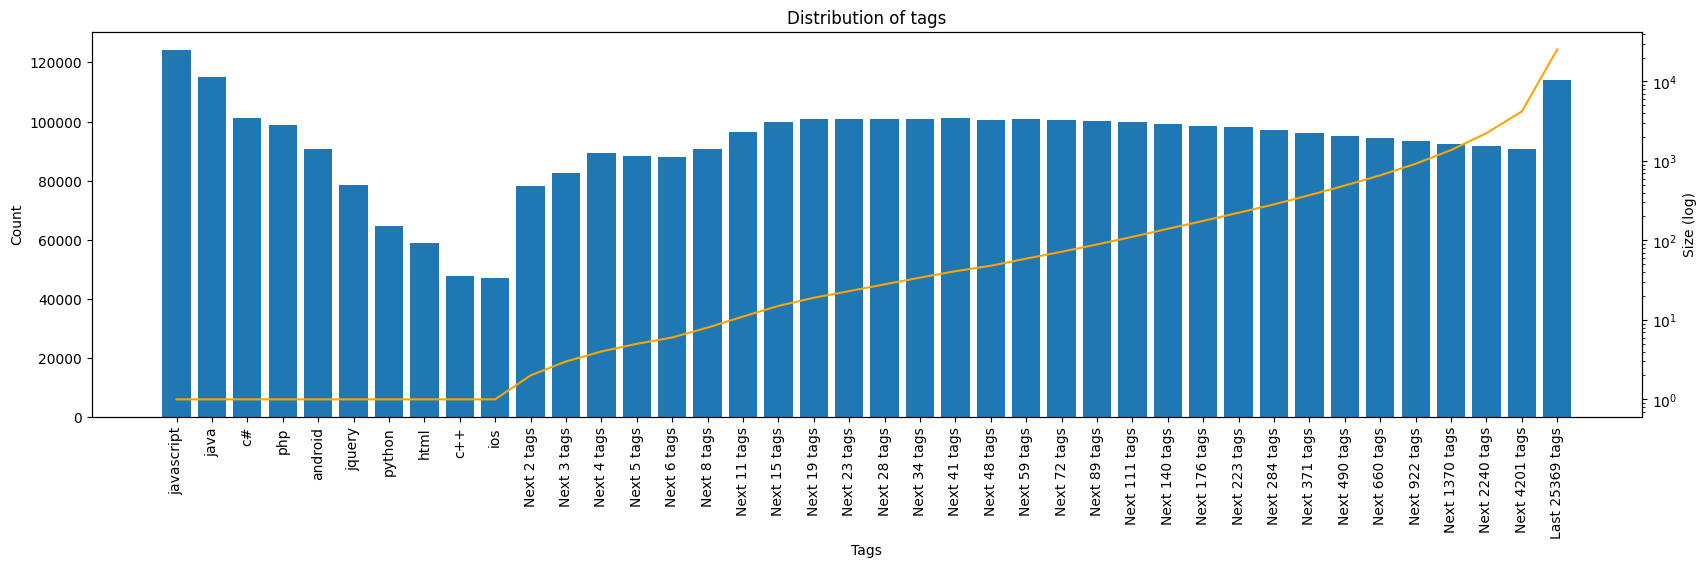

In [33]:
# Визуализация распределения тегов
fig, ax1 = plt.subplots(figsize=(20, 5))
tag_plot_name = tags_count['Tag'][:10].to_list()
tag_plot_count = tags_count['Count'][:10].to_list()
summer = 0
prev_i = 10
for i in range(11, len(tags_count)):
    summer += tags_count['Count'][i]
    if (summer >= tag_plot_count[-1] * 0.99):
        tag_plot_count.append(summer)
        tag_plot_name.append(f'Next {i - prev_i} tags')
        summer = sum(tags_count['Count'][i:min(i - prev_i, len(tags_count))])
        i_t = i
        i += i - prev_i
        prev_i = i_t
tag_plot_count[-1] += summer
tag_plot_name[-1] = f'Last {(len(tags_count) - prev_i) + int(tag_plot_name[-1].split()[1])} tags'
plt.bar(tag_plot_name, tag_plot_count)
plt.xticks(rotation=90)
plt.xlabel('Tags')
plt.ylabel('Count')

tag_plot_size = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
for i in range(10, len(tag_plot_count)):
    tag_plot_size.append(int(tag_plot_name[i].split()[1]))
ax2 = ax1.twinx()
plt.plot(np.arange(len(tag_plot_size)), tag_plot_size, color='orange')
ax2.set_yscale('log')
plt.title('Distribution of tags')
plt.ylabel('Size (log)')
plt.show()

Из графика видно, что самый популярный тег встречается чаще, чем последние 25000. Также по тенденции заметно,что количество тегов, имеющих столько же в сумме вопросов, как и предыдущие теги растёт квадратично, сначала прибавляя по 10%, в конце это уже 50%. Скачок в конце говорит, что много тегов не имеют вопросов.

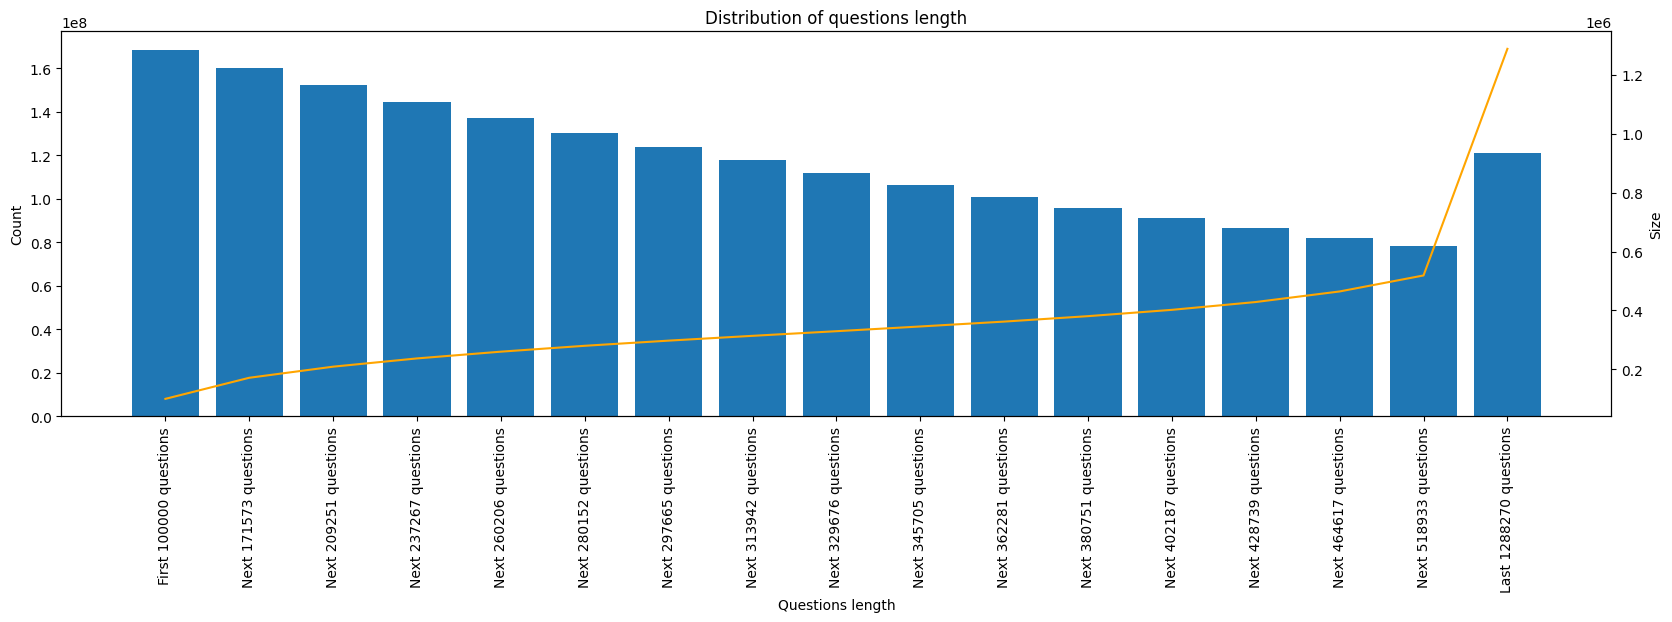

In [30]:
# Визуализация распределения длины вопросов объединённого датасета
fig, ax1 = plt.subplots(figsize=(20, 5))
len_questions = sorted(questions_dataset['Body_question'].fillna('').str.len())[::-1]
len_questions_name = ['First 100000 questions']
len_questions_count = [sum(len_questions[:100000])]
summer = 0
prev_i = 100000
for i in range(100001, len(len_questions)):
    summer += len_questions[i]
    if (len_questions[i] == 0):
        break
    if (summer >= len_questions_count[-1] * 0.95):
        len_questions_count.append(summer)
        len_questions_name.append(f'Next {i - prev_i} questions')
        summer = sum(len_questions[i:min(i - prev_i, len(len_questions))])
        i_t = i
        i += i - prev_i
        prev_i = i_t
len_questions_count[-1] += summer
len_questions_name[-1] = f'Last {(len(len_questions) - prev_i) + int(len_questions_name[-1].split()[1])} questions'
plt.bar(len_questions_name, len_questions_count)
plt.xticks(rotation=90)
plt.xlabel('Questions length')
plt.ylabel('Count')

len_questions_size = [100000]
for i in range(1, len(len_questions_count)):
    len_questions_size.append(int(len_questions_name[i].split()[1]))
ax2 = ax1.twinx()
plt.plot(np.arange(len(len_questions_size)), len_questions_size, color='orange')
plt.title('Distribution of questions length')
plt.ylabel('Size')
plt.show()

Из графика видно, что длина первых 100000 вопросов на 30% больше, чем длина последних 1288000 вопросов. Это также говорит о том, что много последних вопросов не имеют текста. В данном случае замечен стабильный рост, каждая следующия группа на около 20000 вопросов больше другой. В конце такой же скачок из-за большого количества вопросов без текста.

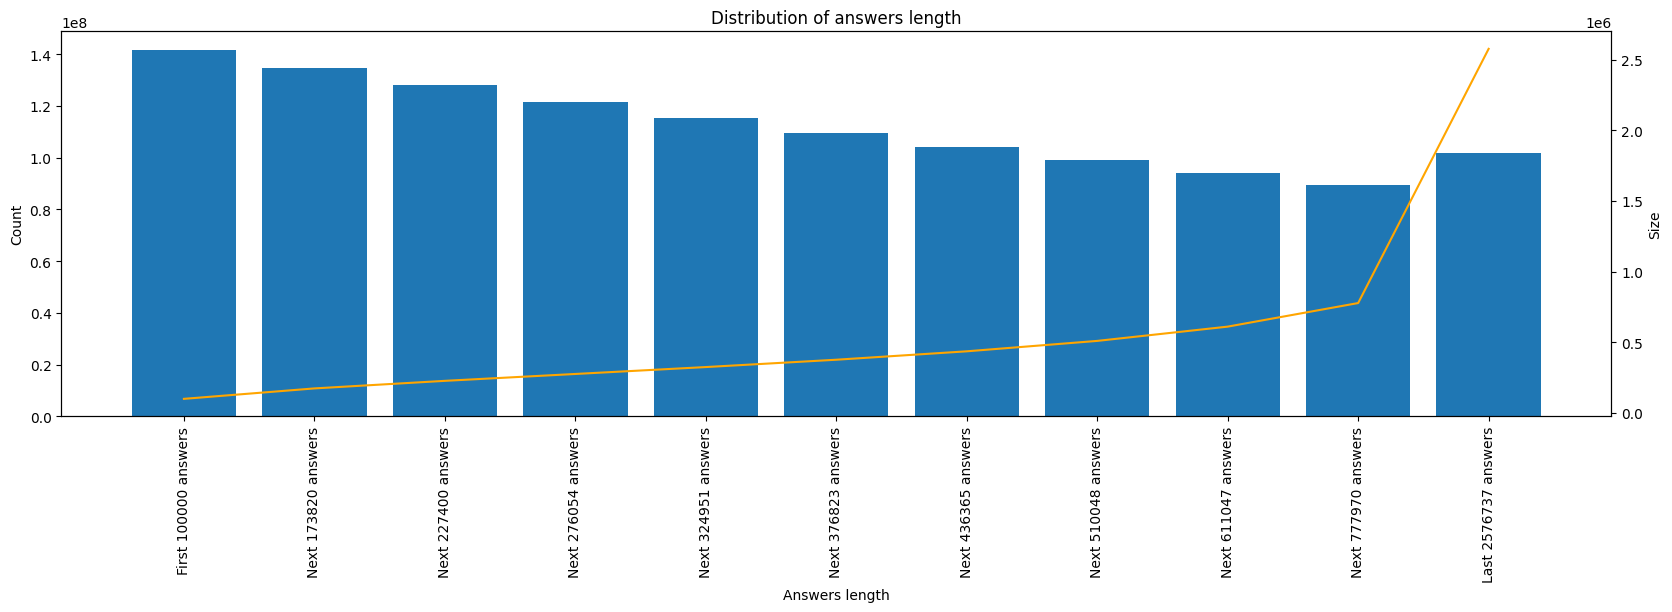

In [34]:
# Визуализация распределения длины ответов объединённого датасета
fig, ax1 = plt.subplots(figsize=(20, 5))
len_answers = sorted(questions_dataset['Body_answer'].fillna('').str.len())[::-1]
len_answers_name = ['First 100000 answers']
len_answers_count = [sum(len_answers[:100000])]
summer = 0
prev_i = 100000
for i in range(100001, len(len_answers)):
    summer += len_answers[i]
    if (len_answers[i] == 0):
        break
    if (summer >= len_answers_count[-1] * 0.95):
        len_answers_count.append(summer)
        len_answers_name.append(f'Next {i - prev_i} answers')
        summer = sum(len_answers[i:min(i - prev_i, len(len_answers))])
        i_t = i
        i += i - prev_i
        prev_i = i_t
len_answers_count[-1] += summer
len_answers_name[-1] = f'Last {(len(len_answers) - prev_i) + int(len_answers_name[-1].split()[1])} answers'
plt.bar(len_answers_name, len_answers_count)
plt.xticks(rotation=90)
plt.xlabel('Answers length')
plt.ylabel('Count')

len_answers_size = [100000]
for i in range(1, len(len_answers_count)):
    len_answers_size.append(int(len_answers_name[i].split()[1]))
ax2 = ax1.twinx()
plt.plot(np.arange(len(len_answers_size)), len_answers_size, color='orange')
plt.title('Distribution of answers length')
plt.ylabel('Size')
plt.show()

В случае ответов - наблюдается такое же стабильный рост, как и в случае вопросов. Но рост быстрее и в среднем на 50000. В конце наблюдается очень большой скачок, так как в данном случае, много вопросов не имеют ответов, это всё создаёт пустые ответы.

# Выводы

В данной лабораторной работе был изучен датасет StackSample, который содержит 10% вопросов и ответов Stack Overflow. Были выполнены следующие шаги:
1. Загрузка данных: Получен единый датасет, состоящий из вопросов, ответов и тегов. Было принято решение, соединять всё с вопросами, так как остальные датасеты связаны только с ним. Из-за этого в дальнейшем наблюдаются большие выбросы в данных, так как много вопросов не имеют ответов. Много вопросов отброшено, но их невозможно анализировать, так как они не связаны с остальными датасетами.
2. Очистка текста: Приведён сырой текст к чистому виду. Удалена HTML-разметка, Markdown, код и прочий «шум» из текста вопросов и ответов. Применена нормализация: приведён текст к единому регистру, удалены стоп-слова и лишние символы, выполнена лемматизация.
Очистка текста оказалась очень время затратной - полтора часа чистого времени обработки. Было принято решение очистить каждый датасет по отдельности, а только потом соединить очищенные. Это позволило сохранить информацию на всякий случай. Также это ускорило процесс обработки, так как в объединённом датасете строки дублируются по 1000 или больше раз. Во время обработки была использована библиотека swifter, которая позволяет использовать многопоточность для обработки данных.
3. Агрегация и регуляризация данных: Вычислены основные характеристики датасета. Определено количество вопросов, среднее число ответов на вопрос, распределение рейтингов. Выполнено агрегирование по тегам: выявлены топ-10 самых популярных тегов.
4. Первичный анализ и визуализация: Проанализированы полученные результаты. Составлено краткое описание датасета.